In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

import seaborn as sns
sns.set_style('whitegrid')

## Dropped rows (with null):
> • Precipitation(in) (1998358)<br>• End_Lat (2246264)<br>• End_Lng (2246264)<br>• Number (1917605)<br>• Wind_Chill(F) (1852623)<br>• Airport_Code (5691)<br>• Pressure(in) (48142)<br>• Wind_Direction (45101)<br>• Timezone (3163)

---
## Dropped rows (no null):
> • ID<br>• Source<br>• Country<br>• Street (157,947 street names)<br>• Turning_Loop (because all False)

In [2]:
df = pd.read_csv('data/2-accidents-cleaned.csv')

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
# 'Start_Lat'
#  'Start_Lng'
df.drop(columns=['Start_Lat', 'Start_Lng'], inplace=True)

In [5]:
df.drop(columns='ID', inplace=True)

In [6]:
severity = df.Severity.value_counts().to_frame()

In [7]:
severity

,Severity
2,1946647
3,861486
4,88955
1,943


In [8]:
severity.reset_index(inplace=True)

In [9]:
severity

,index,Severity
0,2,1946647
1,3,861486
2,4,88955
3,1,943


In [10]:
severity.sort_values(by=['index'], inplace=True)

In [11]:
severity

,index,Severity
3,1,943
0,2,1946647
1,3,861486
2,4,88955


In [12]:
severity.reset_index(inplace=True)

In [13]:
severity

,level_0,index,Severity
0,3,1,943
1,0,2,1946647
2,1,3,861486
3,2,4,88955


In [14]:
severity.drop('level_0', 1, inplace=True)

In [15]:
severity.rename(columns={'index': 'Severity', 'Severity': 'Frequency'}, inplace=True)

In [16]:
severity

,Severity,Frequency
0,1,943
1,2,1946647
2,3,861486
3,4,88955


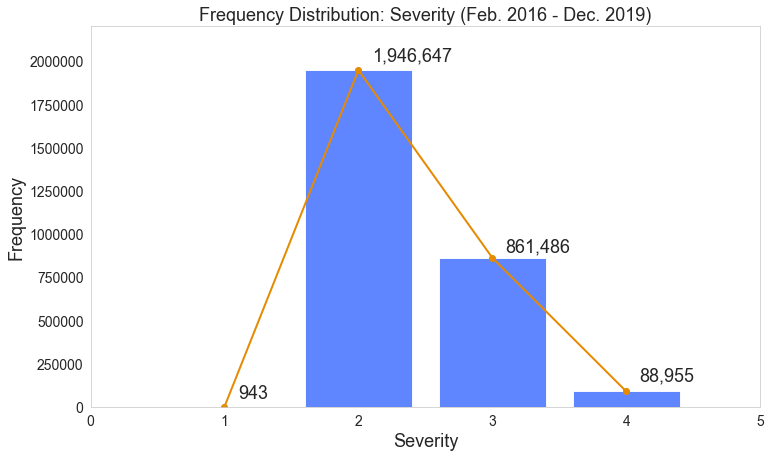

In [17]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

plt.figure(figsize=(12,7))
plt.plot(range(1,5), severity['Frequency'], 'o-', color='#e68a00')
plt.bar(range(1,5), severity['Frequency'],
       color='#4d79ff',
        alpha=0.9)
plt.text(1.10, 50000, '943',
        fontsize=18)
plt.text(2.10, 2000000, '1,946,647',
        fontsize=18)
plt.text(3.10, 900000, '861,486',
        fontsize=18)
plt.text(4.10, 150000, '88,955',
        fontsize=18)
plt.xlim(0,5)
plt.ylim(0, 2200000)
plt.grid(False)
plt.title('Frequency Distribution: Severity (Feb. 2016 - Dec. 2019)',
         fontsize=18)
plt.xlabel('Severity',
          fontsize=18)
plt.ylabel('Frequency',
          fontsize=18)
plt.savefig('img/severity-dist.jpg')

In [18]:
df.Severity.value_counts()

2    1946647
3     861486
4      88955
1        943
Name: Severity, dtype: int64

In [19]:
df.drop('Source', 1, inplace=True)

In [20]:
df.drop('Country', 1, inplace=True)

In [21]:
df.drop('Street', 1, inplace=True)

In [22]:
df.City.value_counts()

Houston        91003
Charlotte      67872
Los Angeles    65400
Austin         58027
Dallas         57688
               ...  
Black River        1
Rothbury           1
Ash                1
Colliers           1
Poultney           1
Name: City, Length: 11507, dtype: int64

In [23]:
df.Turning_Loop.value_counts()

False    2898031
Name: Turning_Loop, dtype: int64

In [24]:
df.drop('Turning_Loop', 1, inplace=True)

In [25]:
# Testing code
df_dummies = df.copy()

In [26]:
df_dummies.columns.tolist()

['TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Distance(mi)',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Weather_Timestamp',
 'Temperature',
 'Humidity_pct',
 'Visibility_mi',
 'Windspeed_mph',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [27]:
df_dummies['Sunrise_Sunset'] = df_dummies['Sunrise_Sunset'].map({'Night':0, 'Day':1})

In [28]:
df_dummies['Astronomical_Twilight'] = df_dummies['Astronomical_Twilight'].map({'Night':0, 'Day':1})

In [29]:
df['Sunrise_Sunset']=df['Sunrise_Sunset'].map({'Night':0, 'Day':1})

In [30]:
df['Civil_Twilight']=df['Civil_Twilight'].map({'Night':0, 'Day':1})

In [31]:
df['Nautical_Twilight']=df['Nautical_Twilight'].map({'Night':0, 'Day':1})

In [32]:
df['Astronomical_Twilight']=df['Astronomical_Twilight'].map({'Night':0, 'Day':1})

In [33]:
df[['Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal']]=df[['Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal']].astype(int)

In [34]:
df.to_csv('data/3-accidents-dummies-next.csv')

In [35]:
df.shape

(2898031, 32)